In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data and checks on labels

Load the three labeled csv files and combine them in one dataframe. Plot also the total number of entries 
for each label using `pandas.DataFrame.describe` method.\
What we can notice is that the total number of bottom jets is approximately two times (four times) the number of charm jets (light jets).
This means that we have to properly normalize the amount of data per each class when we will split the total dataset in train, validation and test.
If we don't properly do this there could be the risk of introducing some error during the training stage, since the number of data with `mc_flavour = 5` is larger than the other two

In [2]:
ljet_data = pd.read_csv('jet_data/ljet_train.csv')
cjet_data = pd.read_csv('jet_data/cjet_train.csv')
bjet_data = pd.read_csv('jet_data/bjet_train.csv')

jet_data = pd.concat([ljet_data, cjet_data, bjet_data], axis=0).reset_index(drop=True)
n_labels = jet_data['mc_flavour'].unique()
print('List of different labels = ', n_labels)

# associate to each label a name
flavour_labels = {0: 'light jets', 4: 'charm jets', 5: 'bottom jets'}
for flavour, name in flavour_labels.items():
    print(f'Label {flavour}: {name}')

flavour_palette = {0:'blue', 4:'orange', 5:'red'}

List of different labels =  [0 4 5]
Label 0: light jets
Label 4: charm jets
Label 5: bottom jets


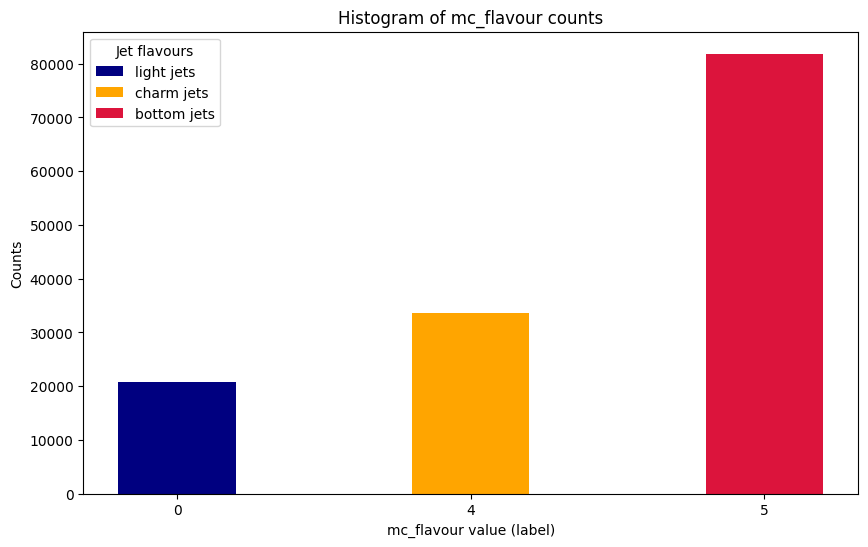

mc_flavour
0    20673.0
4    33505.0
5    81852.0
Name: count, dtype: float64
Bottom-light jets ratio =  3.9593672906689887
Charm-light jets ratio =  1.6207130073042133


In [3]:
df_description = jet_data.groupby('mc_flavour').describe()
label_counts = df_description['PT']['count']

# plot counts vs mc_flavour value to understand how many data for each class we have
plt.figure(figsize=(10,6))
bars = plt.bar(x=label_counts.index.astype(str), height=label_counts.values, width=0.4, color=['navy', 'orange', 'crimson'])
plt.title('Histogram of mc_flavour counts')
plt.xlabel('mc_flavour value (label)')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.legend(bars, flavour_labels.values(), title="Jet flavours")
plt.show()

print(label_counts)

bl_ratio = label_counts[5]/label_counts[0]
cl_ratio = label_counts[4]/label_counts[0]

print('Bottom-light jets ratio = ', bl_ratio)
print('Charm-light jets ratio = ', cl_ratio)

## Understand which features are more important than others. Plot some features for each class

Consider a subset of all the features and plot them for each `mc_flavour` of the dataset. I am considering the features that should be more important for jet classification according to papers/literature

In [4]:
def plot_feature(feature:str, mc_filter:int=None, xlabel:str=None, ylabel:str='Counts', yscale:str='linear', nbins:int=30, multiple:str='layer') -> None:
    plt.figure(figsize=(10,6))

    data_to_plot = jet_data if mc_filter is None else jet_data[jet_data['mc_flavour'] == mc_filter]

    # plot 3 histograms considering that feature for all the class in the dataset 
    sns.histplot(data=data_to_plot, 
                 x=feature, 
                 hue=mc_filter if mc_filter is not None else 'mc_flavour',
                 multiple=multiple, 
                 kde=False,
                 bins=nbins, 
                 palette=flavour_palette if mc_filter is None else [flavour_palette[mc_filter]],
                )
    
    plt.title(f'Distribution of {feature} grouped by mc_flavour')
    plt.xlabel(feature if xlabel is None else feature+xlabel)
    plt.ylabel(ylabel)
    plt.yscale(yscale)

    # custom legend. Associate to each mc_flavour a the corresponding jet flavour name
    custom_handles = [
        plt.Line2D([0], [0], color=flavour_palette[0], lw=4),
        plt.Line2D([0], [0], color=flavour_palette[4], lw=4),
        plt.Line2D([0], [0], color=flavour_palette[5], lw=4),
    ]
    
    plt.legend(custom_handles, flavour_labels.values(), title='Jet flavours')
    plt.show()

Let's consider the list of all the features contained in the jet dataset and plot feature by feature for all three different `mc_flavour`. Considerations based on features plot:

- **PT:** the distribution of the transverse momentum of a light jet seems to have more tails wrt to those of HF jets. Higher values of PT $\rightarrow$ more likely to be a light flavour jet? Maybe light jets carry more transverse momentum because they don't have SV (that could take a fraction of the total jet transverse momentum). **To be checked**

- **drSvrJet:** $\Delta R$ between SV and jet. For HF we should expect small values, because heavy quarks decay and the SV should be close (correlated) to the jet. The distributions are very similar, but for light jets we see more entries for high $\Delta R$ values

- **fdrMin:** there are differences between the three distributions. Is it something related to the flight distance? Could be importan $\rightarrow$ **To be checked**

- **m:** distribution of the mass of the jets. However, all three seem to be very similar

- **nTrkJet:** probably the number of tracks in the jet. Is it possible to see that bottom jets dominate for high values of nTrkJet. The same can't be stated by looking at **nTrk** distributions

- **tau**: high for HF jets

- **ipChi2Sum:** presence of events due to light jets for for values greater than 70.000

In [5]:
# list of all the features of the dataset
all_features = jet_data.columns
print('All jet data features:\n', all_features.values)

All jet data features:
 ['PT' 'ETA' 'mc_flavour' 'drSvrJet' 'fdChi2' 'fdrMin' 'm' 'mCor' 'mCorErr'
 'nTrk' 'nTrkJet' 'pt' 'ptSvrJet' 'tau' 'ipChi2Sum']


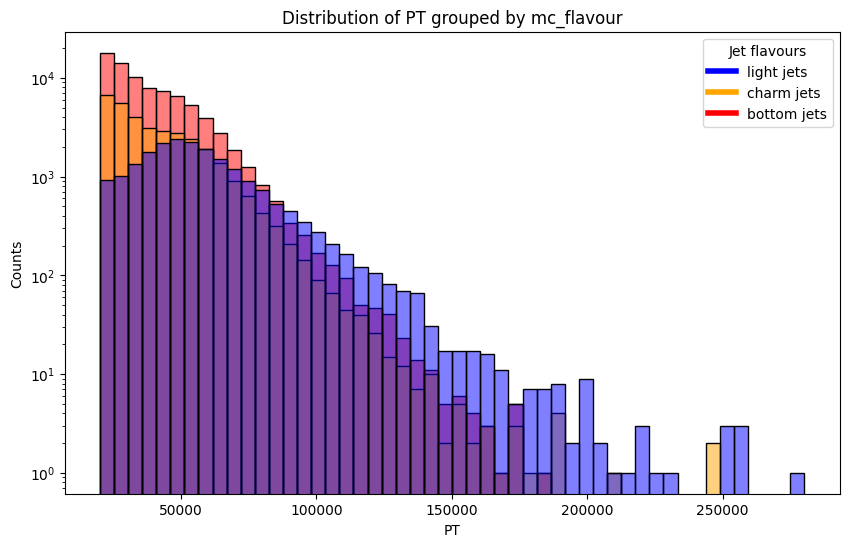

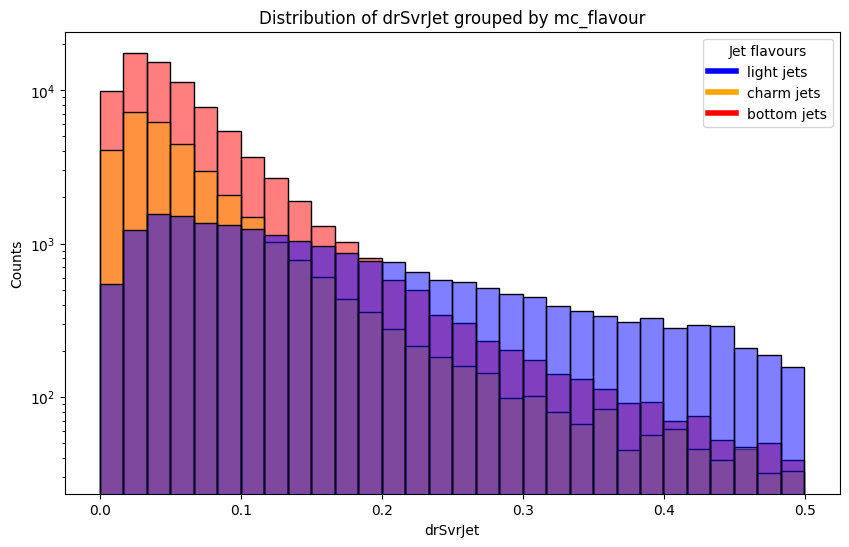

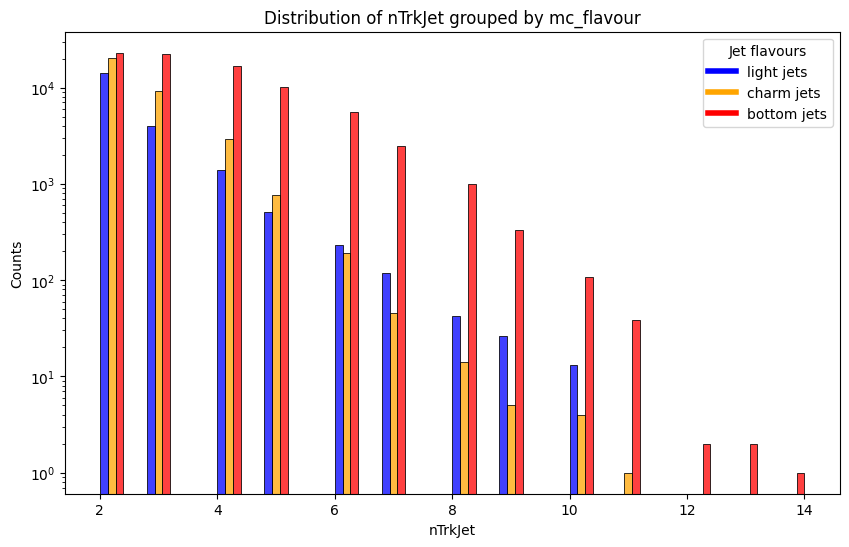

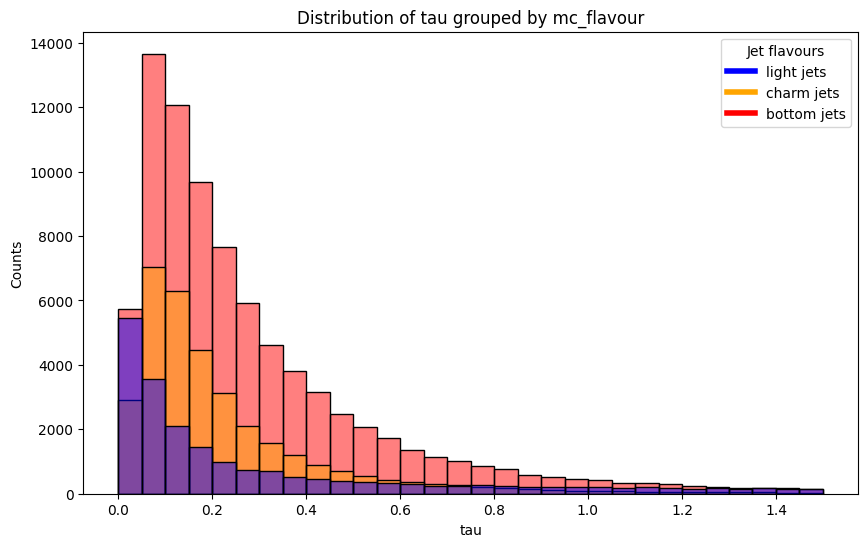

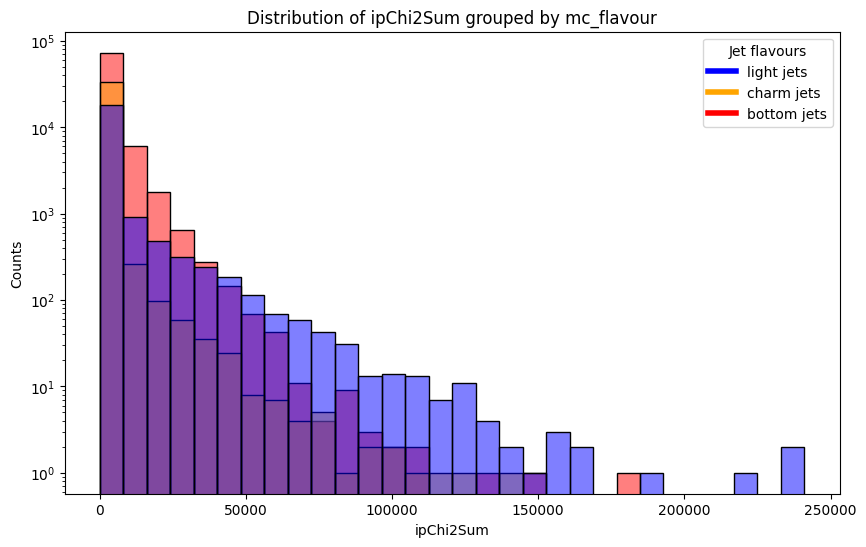

In [6]:
#plot_feature('PT', yscale='log', nbins=50, mc_filter=0) # DEBUG
#plot_feature('PT', yscale='log', nbins=50, mc_filter=4) # DEBUG
#plot_feature('PT', yscale='log', nbins=50, mc_filter=5) # DEBUG

plot_feature('PT', yscale='log', nbins=50) # seems useful
#plot_feature('ETA') # don't know
plot_feature('drSvrJet', yscale='log') # seems useful

#plot_feature('fdChi2', yscale='log') # doesnt't seem useful
#plot_feature('fdrMin', yscale='log') # could be useful

#plot_feature('m', yscale='log') # doesnt't seem useful
#plot_feature('mCor', yscale='log') # doesnt't seem useful
#plot_feature('mCorErr', yscale='log') # doesnt't seem useful

#plot_feature('nTrk', yscale='log', multiple='dodge') # don't know. Shoul be important      
plot_feature('nTrkJet', yscale='log', multiple='dodge') # don't know. Shoul be important

#plot_feature('pt', yscale='log') # doesn't seem useful
#plot_feature('ptSvrJet', yscale='log') # doesn't seem useful

plot_feature('tau') # should be useful
plot_feature('ipChi2Sum', yscale='log') # maybe it is useful

### PCA to understand which features are important to train the model

PCA is needed to extract information from the features into a smaller number of uncorrelated components.Some features maybe highly correlated. With PCA we can remove redudant features and improve the training stage. The uncorrelated variable are called Principal Components (PCs). PCs capture the most variance in the data, and are linear combination of the original features. They also help improve visualization, because we have 15 features and in this way we can visualize them using 2D or 3D plots

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [8]:
# PCA considering all the features of the dataset. We can also use just a subset of the features highlighted before.
# Consider also labels
#PCA_features = ['PT', 'drSvrJet', 'nTrkJet', 'tau', 'ipChi2Sum']
PCA_features = jet_data.columns.values
PCA_features = np.delete(PCA_features, np.where(PCA_features == 'mc_flavour')) # delete mc_flavour since it is the label
print('Features selected for PCA:\n', PCA_features)

X = jet_data[PCA_features]
y = jet_data['mc_flavour']

# with_mean and with_std are by default True. This means that data will be shifted to have mean = 0 and variance = 1
std_scaler = StandardScaler(with_mean=True, with_std=True)

# X_scaled will have shape (n_samples, n_features). n_features = 14. So the array has n_samples elements, where each
# element is another containing transformed values of all 14 features, so that mean = 0 and variance = 1
X_scaled = std_scaler.fit_transform(X)

Features selected for PCA:
 ['PT' 'ETA' 'drSvrJet' 'fdChi2' 'fdrMin' 'm' 'mCor' 'mCorErr' 'nTrk'
 'nTrkJet' 'pt' 'ptSvrJet' 'tau' 'ipChi2Sum']


**Explained variace ratio:** percentage of variance explained by each selected component.
Do PCA wihtout specifying `n_components`, so that it is possible to see what is the cumulative variance considering different PCs.
Then we can do again PCA by selecting a specific number of `n_components`. For example one can set it when a given variance threshold is reached.

From the first plot we can see that variance is above 90-95 % when n_components > 8

Explained variance ratio without setting number of PCs:
 [0.23522941 0.39287126 0.51018384 0.60640823 0.68597319 0.75451359
 0.82053923 0.88245113 0.92751765 0.96384032 0.98157383 0.99327918
 0.9982489  1.        ]
Number of components to have variance higher than 0.9 =  9


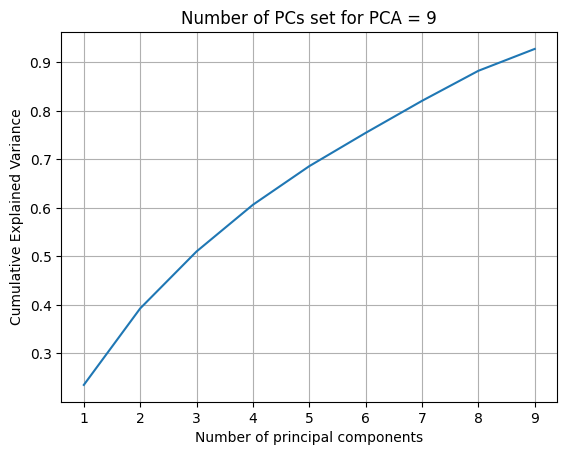

In [9]:
pca_all_components = PCA()
pca_all_components.fit(X_scaled)
explained_variance_ratio = np.cumsum(pca_all_components.explained_variance_ratio_)

# use number of pricipal components such that variance is above a threshold
print('Explained variance ratio without setting number of PCs:\n', explained_variance_ratio)
components = np.where(explained_variance_ratio > 0.9)[0]
print('Number of components to have variance higher than 0.9 = ', components[0]+1)

n_components = 9
pca = PCA(n_components=n_components)
pca.fit(X_scaled)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title(f'Number of PCs set for PCA = {n_components}')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Plot of explained variance ratio: plot to see how much variance each principal component explains. Component 1 has the highest variance, which is also higher of all the other ones. The variance carried by other PCs is more "uniform"

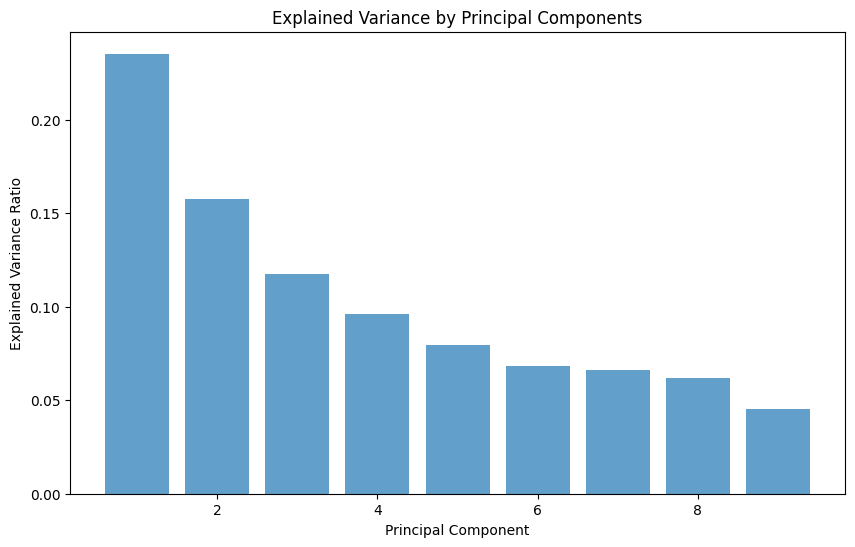

In [10]:
plt.figure(figsize=(10,6))
plt.bar(range(1,n_components+1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [11]:
# this can be used to understand how much each feature contribute to the PC
loadings = pca.components_ # pca loadings
for i, component in enumerate(loadings[0:3]):
    print(f"Component {i+1}: {component}\n")


Component 1: [ 0.03212902  0.03479235 -0.07537787  0.04685139 -0.04696694  0.43551871
  0.37191813  0.04013135  0.45103018  0.41732079  0.33998544  0.34363539
 -0.16099998  0.14450966]

Component 2: [ 0.05272834 -0.04694998 -0.29105268  0.16453536  0.58078884 -0.10068041
 -0.20076587 -0.02192359  0.10617253  0.1426951   0.0540309   0.02829731
  0.51307551  0.44316026]

Component 3: [ 0.23211061 -0.19895211 -0.23351937 -0.07613437  0.13836149 -0.19799098
 -0.07935624  0.19292405 -0.30798776 -0.23960241  0.56059484  0.46063585
 -0.1337072  -0.21853647]



In [12]:
# compute feature importance from PCA loadings.
# Sum the importance of each feature in all PCs -> Why sum the squared of the importance?
feature_importance = np.sum(pca.components_**2, axis=0)
feature_names = jet_data.columns.drop('mc_flavour')

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


      Feature  Importance
1         ETA    0.998667
7     mCorErr    0.997462
3      fdChi2    0.979116
2    drSvrJet    0.940291
0          PT    0.877059
11   ptSvrJet    0.561610
6        mCor    0.519750
9     nTrkJet    0.519028
10         pt    0.501916
5           m    0.498664
8        nTrk    0.442708
4      fdrMin    0.412993
12        tau    0.407105
13  ipChi2Sum    0.343631


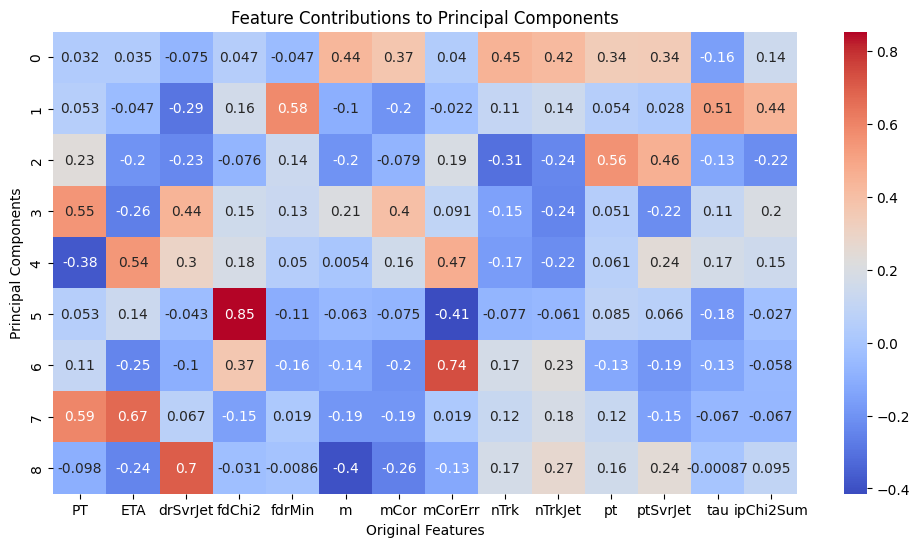

In [14]:
# heatmap of PCA components and feature contributions
plt.figure(figsize=(12,6))
iPC = 9
sns.heatmap(pca.components_[:iPC], annot=True, cmap='coolwarm', 
            xticklabels=feature_names)
plt.title('Feature Contributions to Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()


# Random Forest for classification

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
features_for_training = ['ETA', 'mCorErr', 'fdChi2', 'drSvrJet', 'PT']

X = jet_data[features_for_training] # input for random forest are data of the selected features
y = jet_data['mc_flavour'] # output: label of the jet

Split the full dataset in train, validation and test datasets. Common percentages are 80-10-10 %.

`stratify` parameter should account for features imbalance in the dataset

In [29]:
# split in training+validation and test first
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size=0.9, random_state=42, stratify=y)

# split training+validation in training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.8, random_state=42, stratify=y_train_val)

In [30]:
print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (97941, 5) (97941,)
Validation set size: (24486, 5) (24486,)
Test set size: (13603, 5) (13603,)


In [ ]:
# create a Random Forest Classifier with defaults parameters, except random_state for 
# reproducibility
rnd_forest = RandomForestClassifier(random_state=17)
rnd_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [33]:
y_test_pred = rnd_forest.predict(X_test)

print('Test dataset accuracy = ', accuracy_score(y_test, y_test_pred)*100)

Test dataset accuracy =  75.34367418951702


Training a random forest classifier with all default parameters gives an accuracy on test dataset of 75.3% (I am completely ignoring validation dataset). 

Of course without specifying parameters the random forest is not optimised. Is it possible to improve the accuracy modifying the percetange of train, validation and test samples? **What happens if the random forest is trained using all the features?**

Let's try reducing the training to 80% instead of 90. And then we can try adding some other feature (or all)